In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Import dữ liệu

In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/PTDL/Doan/Airplane_Crashes_and_Fatalities_Since_1908.csv')
Data

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [ ]:
Data.sample(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
3221,06/02/1980,NaN,"Near Yachiba, Bolivia",Lloyd Aereo Boliviano,NaN,NaN,Fairchild F-27J,CP-1117,0118,13.0,13.0,0.0,Crashed in the Tapecua mountains.
1621,09/24/1959,17:20,"Great Sitkin Island, Alaska",Reeve Aleutian Airlines,3,Shemya - Cold Bay - Adak - Anchorage,Douglas C-54B,N63396,10486,16.0,16.0,0.0,Crashed into a mountain while on approach to A...
3300,08/11/1981,19:15,"Skagway, Alaska",Skagway Air Service - Air Taxi,NaN,"Skagway, AK - Local",Piper PA-32,N8224Q,NaN,6.0,6.0,0.0,The aircraft's right wing impacted a boulder w...
1743,11/08/1961,21:24,"Near Richmond, Virginia",Imperial Airways,201/8,Baltimore - Columbia SC,Lockheed C-69 Constellation,N2737A,1976,79.0,77.0,0.0,"Flown under a military contract, several proce..."
4986,05/14/2004,18:30,"Near Manaus, Brazil",Rico Linhas Aereas,4815,Sao Paulo - Tefe - Manaus,Embraer 120ER Brasilia,PT-WRO,120070,33.0,33.0,0.0,The plane dropped off radar at Manaus' Eduardo...


# Kiểm tra dữ liệu

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [ ]:
Data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [ ]:
Data.shape

(5268, 13)

In [ ]:
Data.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

# Xử lý dữ liệu

In [ ]:
Data.drop(['Flight #', 'Registration', 'cn/In'], axis=1, inplace=True)

In [ ]:
Data['Location'].fillna("Unknown", inplace=True)
Data['Operator'].fillna("Unknown", inplace=True)
Data['Route'].fillna("Unknown", inplace=True)
Data['Type'].fillna("Unknown", inplace=True)
Data['Summary'].fillna("Unknown", inplace=True)

In [ ]:
Data['Time'] = Data['Time'].replace(np.nan, '00:00')
Data['Time'] = Data['Time'].str.replace('c: ', '')
Data['Time'] = Data['Time'].str.replace('c:', '')
Data['Time'] = Data['Time'].str.replace('c', '')
Data['Time'] = Data['Time'].str.replace('12\'20', '12:20')
Data['Time'] = Data['Time'].str.replace('18.40', '18:40')
Data['Time'] = Data['Time'].str.replace('0943', '09:43')
Data['Time'] = Data['Time'].str.replace('22\'08', '22:08')
Data['Time'] = Data['Time'].str.replace('114:20', '00:00')

Data['Time'] = Data['Date'] + ' ' + Data['Time'] #joining two rows
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
Data['Time'] = Data['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(Data.Time.min()) + ' to ' + str(Data.Time.max()))

Data.Operator = Data.Operator.str.upper()

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


<ipython-input-362-37782d8a3dd3>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  Data['Time'] = Data['Time'].str.replace('18.40', '18:40')


In [ ]:
def drop_missing_data_rows(Data: pd.DataFrame):
    missing_data_rows = pd.isna(Data["Time"]) | pd.isna(Data["Date"]) | pd.isna(Data["Aboard"]) | pd.isna(Data["Fatalities"]) | pd.isna(Data["Ground"])
    return Data.drop(Data[missing_data_rows].index, axis=0)

def convert_float_to_int (Data: pd.DataFrame):
    columns = Data.select_dtypes(include=['float64']).columns
    Data[columns] = Data[columns].apply(pd.to_numeric, downcast='integer', errors='coerce')
    return Data

Data = drop_missing_data_rows(Data)
Data = convert_float_to_int(Data)

In [ ]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df_no_outliers = df[~((df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR)))]
    return df_no_outliers

# Sử dụng hàm
Data_no_outliers = remove_outliers(Data, 'Fatalities')

In [ ]:
Data.isnull().sum()

Date          0
Time          0
Location      0
Operator      0
Route         0
Type          0
Aboard        0
Fatalities    0
Ground        0
Summary       0
dtype: int64

# Phân tích dữ liệu

#Câu 1: phân phối của số người tử vong trên máy bay, số người tử vong trên mặt đất và số người trên máy bay trong các vụ tai nạn máy bay ra sao?

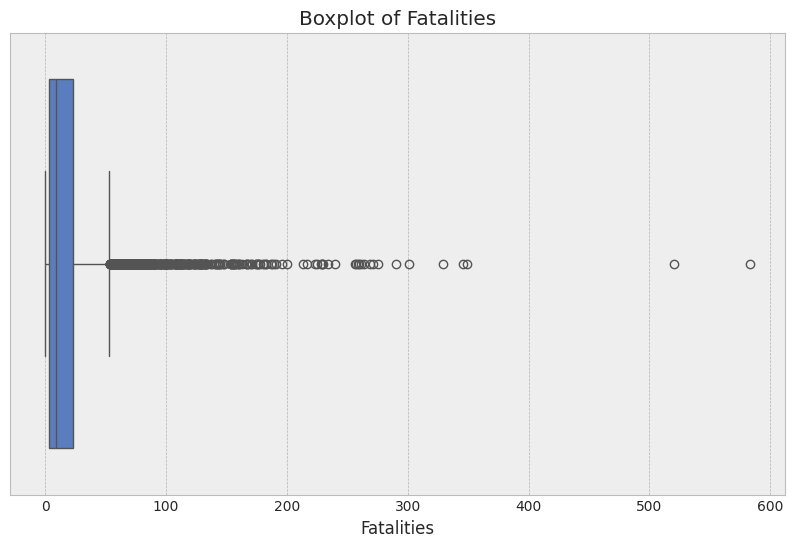

In [ ]:
# Vẽ biểu đồ boxplot cho cột 'Fatalities'
plt.figure(figsize=(10, 6))
sns.boxplot(x=Data['Fatalities'])
plt.title('Boxplot of Fatalities')
plt.show()

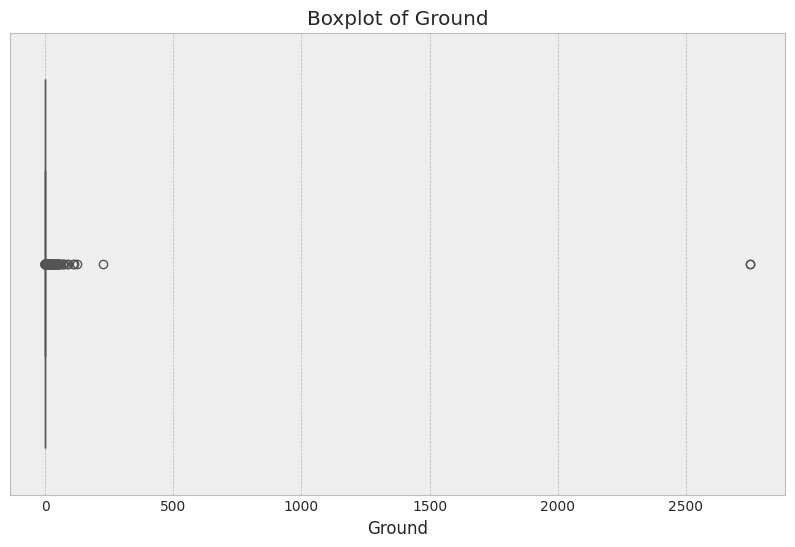

In [ ]:
# Vẽ biểu đồ boxplot cho cột 'Ground' (số người tử vong trên mặt đất)
plt.figure(figsize=(10, 6))
sns.boxplot(x=Data['Ground'])
plt.title('Boxplot of Ground')
plt.show()

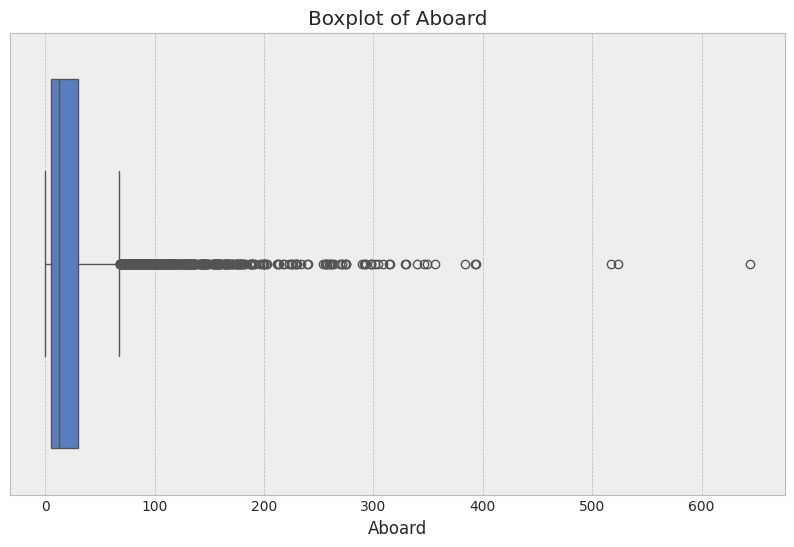

In [ ]:
# Vẽ biểu đồ boxplot cho cột 'Aboard'
plt.figure(figsize=(10, 6))
sns.boxplot(x=Data['Aboard'])
plt.title('Boxplot of Aboard')
plt.show()

Dữ liệu tập trung chủ yếu tập trung nhiều nhất vào khoảng 0-200 cho thấy hầu hết quan sát
trên tập dữ liệu nằm trên khoảng này. Sau đó, khoảng 200-300 cũng tập trung khá nhiều. Từ
khoảng 300 trở về sau dữ liệu ít dần

#Câu 2: Biểu đồ phân rã mùa vụ

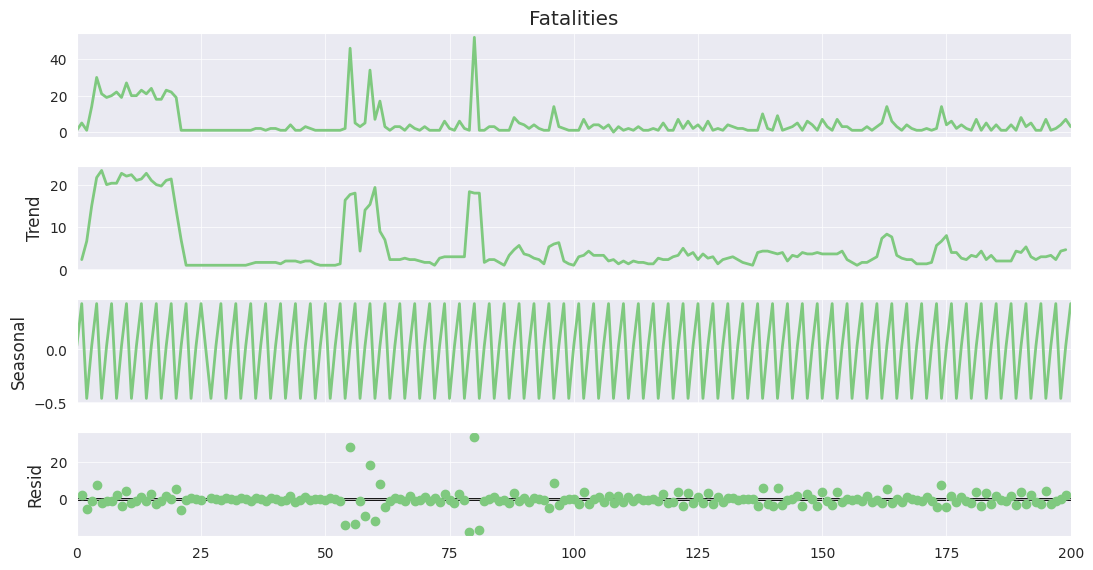

In [ ]:
seasonal_ = seasonal_decompose(Data['Fatalities'].head(200), period=3)

sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = seasonal_.plot();
ax.set_size_inches((12, 6))
ax = ax

- Xu hướng (Trend): Thể hiện sự biến động của dữ liệu theo thời gian, với các đỉnh nổi bật. Có thể thấy các khoảng thời gian có tử vong tăng cao.
- Mùa (Seasonal): Hiển thị các mẫu dao động đều đặn, lặp lại theo chu kỳ thời gian cố định.
- Dư thừa (Residual): Chứa các nhiễu, không đều trong dữ liệu tử vong sau khi loại bỏ xu hướng và mùa

#Câu 3: Số lượng tai nạn hàng không thay đổi như thế nào theo thời gian?

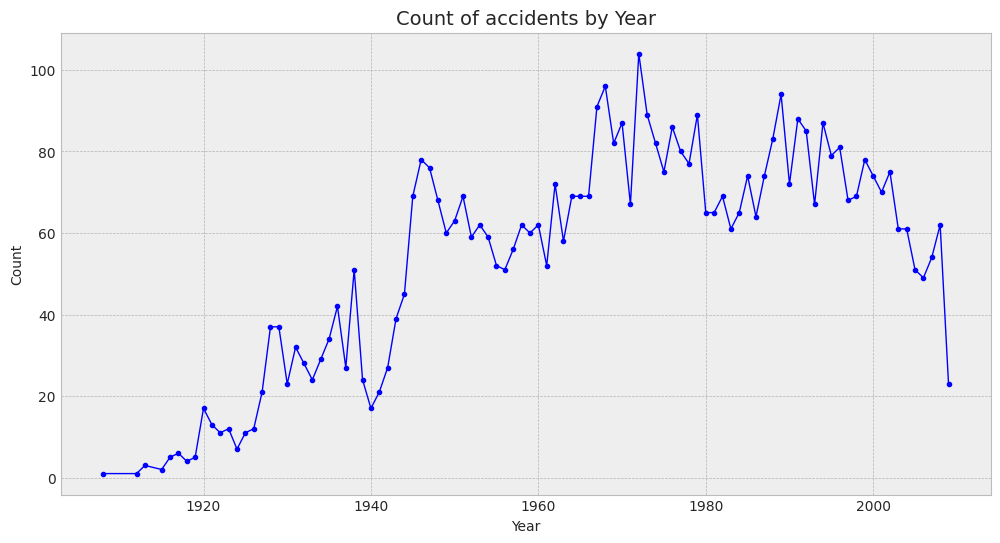

In [ ]:
Temp = Data.groupby(Data.Time.dt.year)[['Date']].count()
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()

Vào năm 1972 số vụ tai nạn máy bay xảy ra nhiều nhất với hơn 100 vụ, sau đó là 1968 và
1989 với khoảng gần 100 vụ. Nguyên nhân có thể do giai đoạn 1964-1973 ngành hàng không
bắt đầu phát triển mạnh

<ipython-input-371-6ca221fae9a0>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')
<ipython-input-371-6ca221fae9a0>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
<ipython-input-371-6ca221fae9a0>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


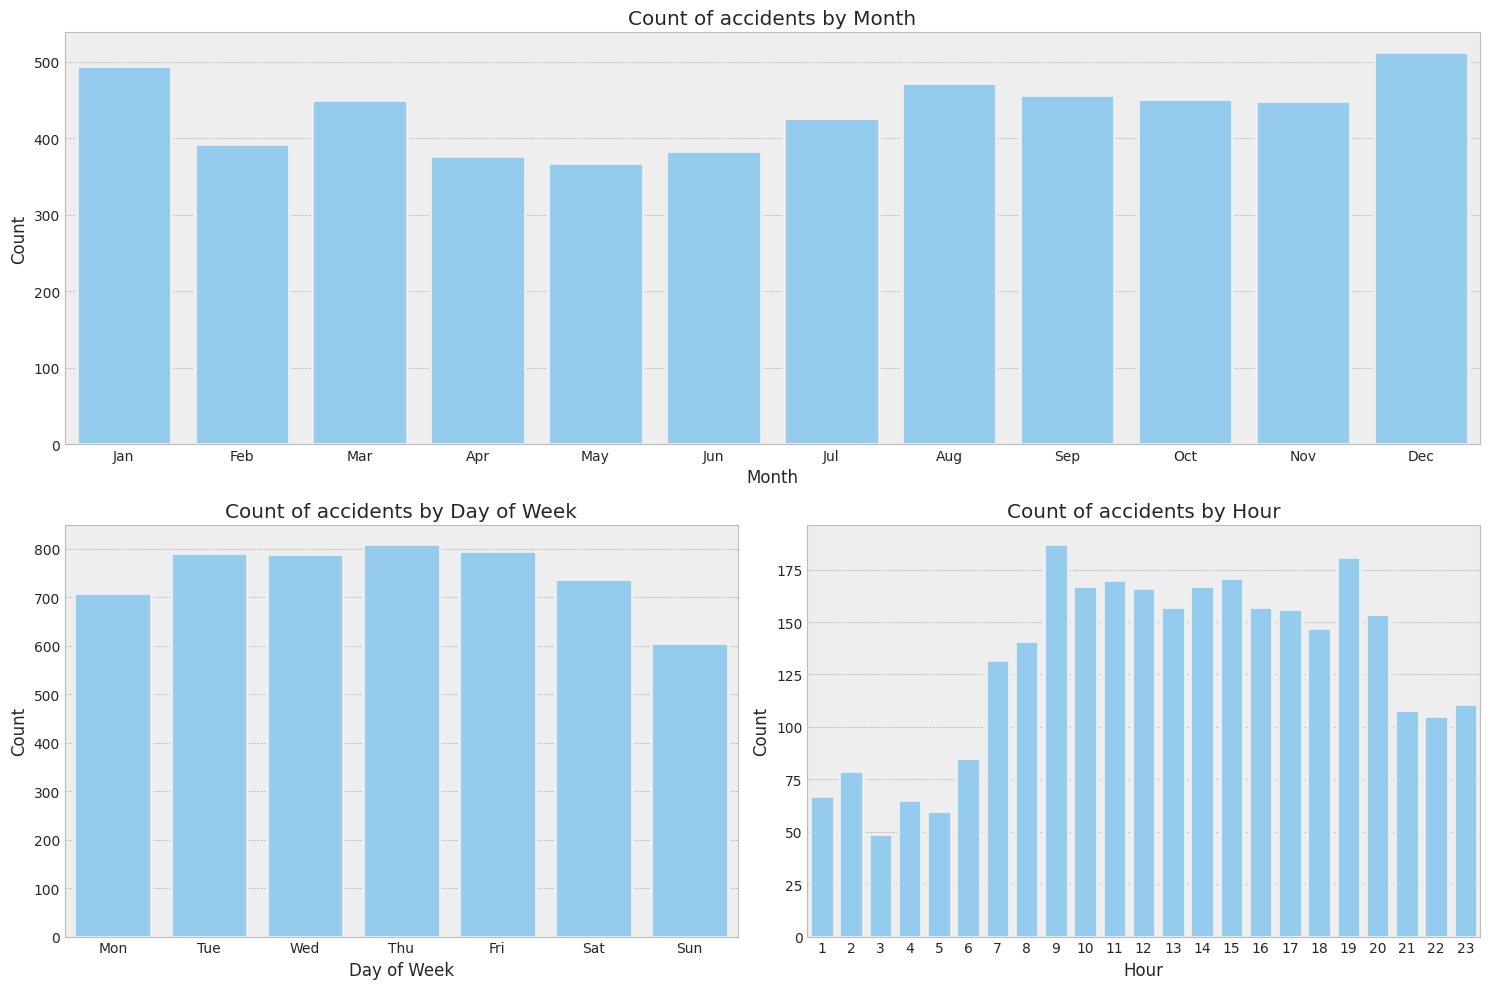

In [ ]:
# Set the style
plt.style.use('seaborn-muted')

# Create a 2x2 grid for subplots with shared x-axis for the bottom plots
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 2)

# Count of accidents by Month
ax1 = fig.add_subplot(gs[0, :]) # Top plot spanning both columns
month_count = Data.groupby(Data.Time.dt.month)['Date'].count()
sns.barplot(ax=ax1, x=month_count.index, y=month_count.values, color='lightskyblue', linewidth=2)
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')
ax1.set_title('Count of accidents by Month')

# Count of accidents by Day of Week
ax2 = fig.add_subplot(gs[1, 0]) # Bottom left plot
weekday_count = Data.groupby(Data.Time.dt.weekday)['Date'].count()
sns.barplot(ax=ax2, x=weekday_count.index, y=weekday_count.values, color='lightskyblue', linewidth=2)
ax2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Count')
ax2.set_title('Count of accidents by Day of Week')

# Count of accidents by Hour
ax3 = fig.add_subplot(gs[1, 1]) # Bottom right plot
hour_count = Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)['Date'].count()
sns.barplot(ax=ax3, x=hour_count.index, y=hour_count.values, color='lightskyblue', linewidth=2)
ax3.set_xlabel('Hour')
ax3.set_ylabel('Count')
ax3.set_title('Count of accidents by Hour')

# Adjust layout
plt.tight_layout()
plt.show()


Trong năm, các vụ tai nạn máy bay xảy ra nhiều nhất ở tháng 12 với hơn 500 vụ, sau đó là
tháng 1 gần 500 vụ. Vào các ngày trong tuần, các vụ tai nạn máy bay xảy ra nhiều nhất vào
khoảng giữa tuần. Và theo giờ, các vụ tai nạn xảy ra nhiều vào lúc 9 giờ và 19 giờ. Nguyên nhân
có thể do nhu cầu di chuyển, vận chuyển vào những khoảng thời gian đó nhiều hơn nên nhiều
chuyến bay được khai thác nên tỉ lệ tai nạn cao hơn

#Câu 4: Số vụ tai nạn máy bay theo từng mùa ra sao?

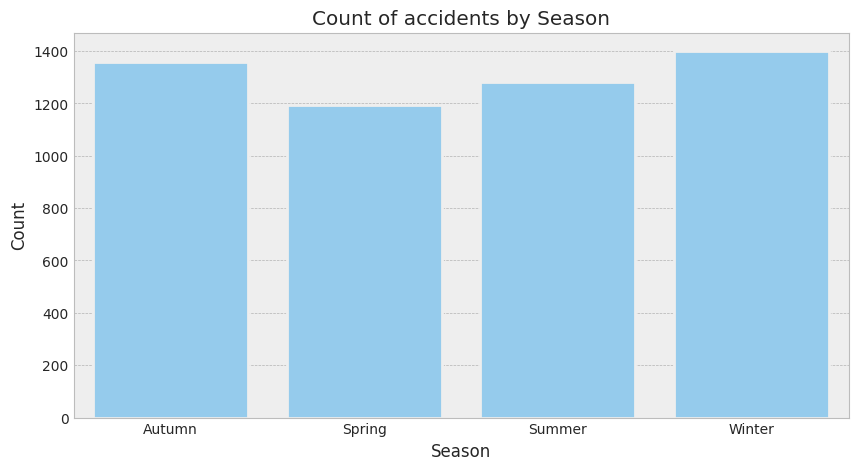

In [ ]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

Data['Season'] = Data['Time'].dt.month.apply(get_season)

# Count of accidents by Season
plt.figure(figsize=(10, 5))
season_count = Data.groupby('Season')['Date'].count()
sns.barplot(x=season_count.index, y=season_count.values, color='lightskyblue', linewidth=2)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count of accidents by Season')
plt.show()


Số vụ tai nạn máy bay theo mùa có tỉ lệ chênh lệch không nhiều. Cao nhất là vào mùa
đông. Sau đó là mùa thu và mùa hè. Thấp nhất là mùa xuân. Nguyên nhân có thể do nhu cầu di chuyển của các hành khách

#Câu 5: Số vụ tai nạn ra sao trong 2 lần chiến tranh thế giới ?

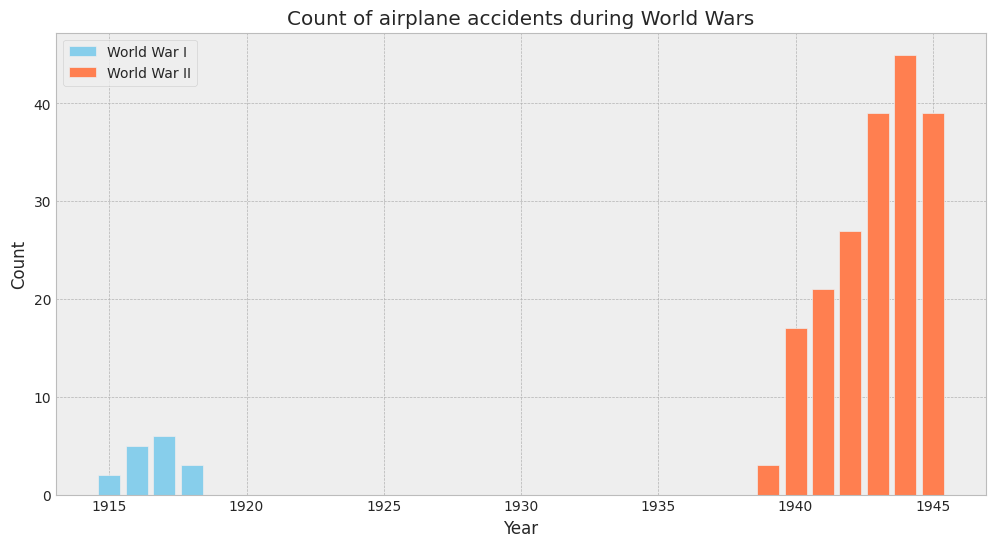

In [ ]:
start_WWI = pd.to_datetime('1914-07-28')
end_WWI = pd.to_datetime('1918-11-11')
start_WWII = pd.to_datetime('1939-09-01')
end_WWII = pd.to_datetime('1945-09-02')

# Lọc dữ liệu để chỉ giữ lại các vụ tai nạn xảy ra trong Thế chiến I và II
WWI_accidents = Data[(Data['Time'] >= start_WWI) & (Data['Time'] <= end_WWI)]
WWII_accidents = Data[(Data['Time'] >= start_WWII) & (Data['Time'] <= end_WWII)]

# Đếm số lượng tai nạn theo năm trong Thế chiến I và II
WWI_accidents_by_year = WWI_accidents.groupby(WWI_accidents.Time.dt.year)['Date'].count()
WWII_accidents_by_year = WWII_accidents.groupby(WWII_accidents.Time.dt.year)['Date'].count()

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
plt.bar(WWI_accidents_by_year.index, WWI_accidents_by_year.values, color='skyblue', label='World War I')
plt.bar(WWII_accidents_by_year.index, WWII_accidents_by_year.values, color='coral', label='World War II')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of airplane accidents during World Wars')
plt.legend()
plt.show()


Chiến tranh Thế giới thứ nhất xảy ra từ 1914-1918. Số vụ máy bay trong khoảng thời gian
này không nhiều, chưa tới 10 vụ/năm. Chiến tranh Thế giới thứ hai xảy ra từ 1939-1945, khoảng
thời gian này số vụ tai nạn máy bay tăng cao. Nhất là vào năm 1944, có gần 50 vụ tai nạn máy
bay. Sau đó là năm 1943 và 1945 với gần 40 vụ. Nguyên nhân có thể do khoảng 1943-1945 là
thời gian đỉnh điểm của Thế chiến thứ 2 nên số vụ tai nạn nhiều do số lượng tai nạn máy bay
quân sự cao. Vào những năm đầu Thế chiến thứ 2, 1939 số vụ tai nạn máy bay còn ít, chưa tới
10 vụ.


#Câu 6: Loại máy bay nào gặp tai nạn nhiều nhất?

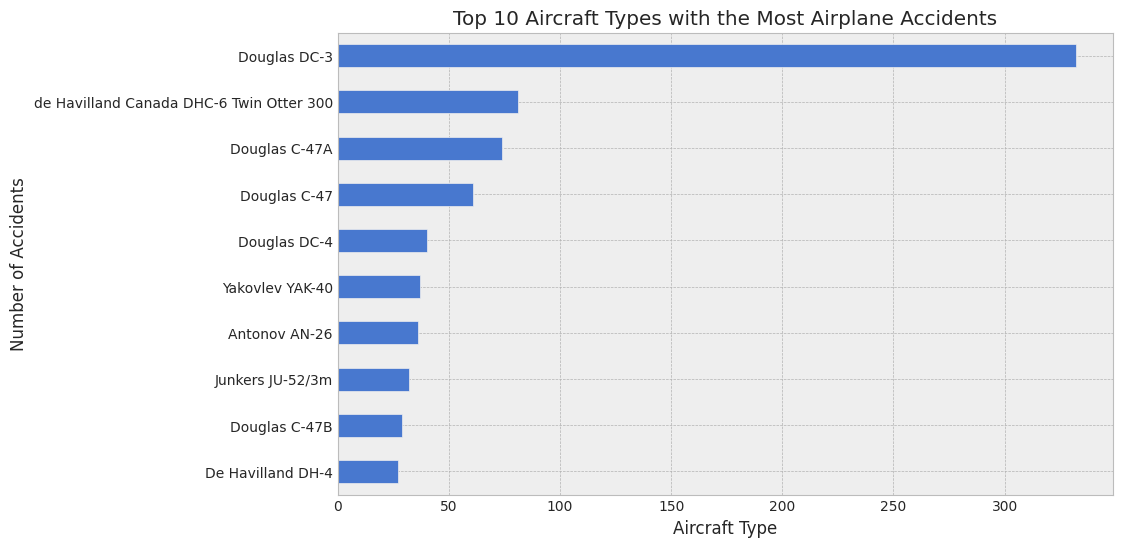

In [ ]:
num_accidents_per_type = Data['Type'].value_counts().head(10)
plt.figure(figsize=(10, 6))
num_accidents_per_type.sort_values().plot(kind='barh')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Aircraft Types with the Most Airplane Accidents')
plt.show()

Loại máy bay xảy ra tai nạn nhiều nhất là Douglas DC-3 với gần 350 vụ. Nguyên nhân
có thể do trong khoảng thời gian ghi nhận thông tin tai nạn 1908 đến 2009 trong tập dữ liệu
này, máy bay Douglas DC-3 phổ biến nên số lượng máy bay và chuyến bay được khai thác
nhiều dẫn đến tỉ lệ tai nạn cao

#Câu 7: Tỉ lệ xảy ra tai nạn của các mẫu máy bay gặp tai nạn nhiều nhất ra sao?

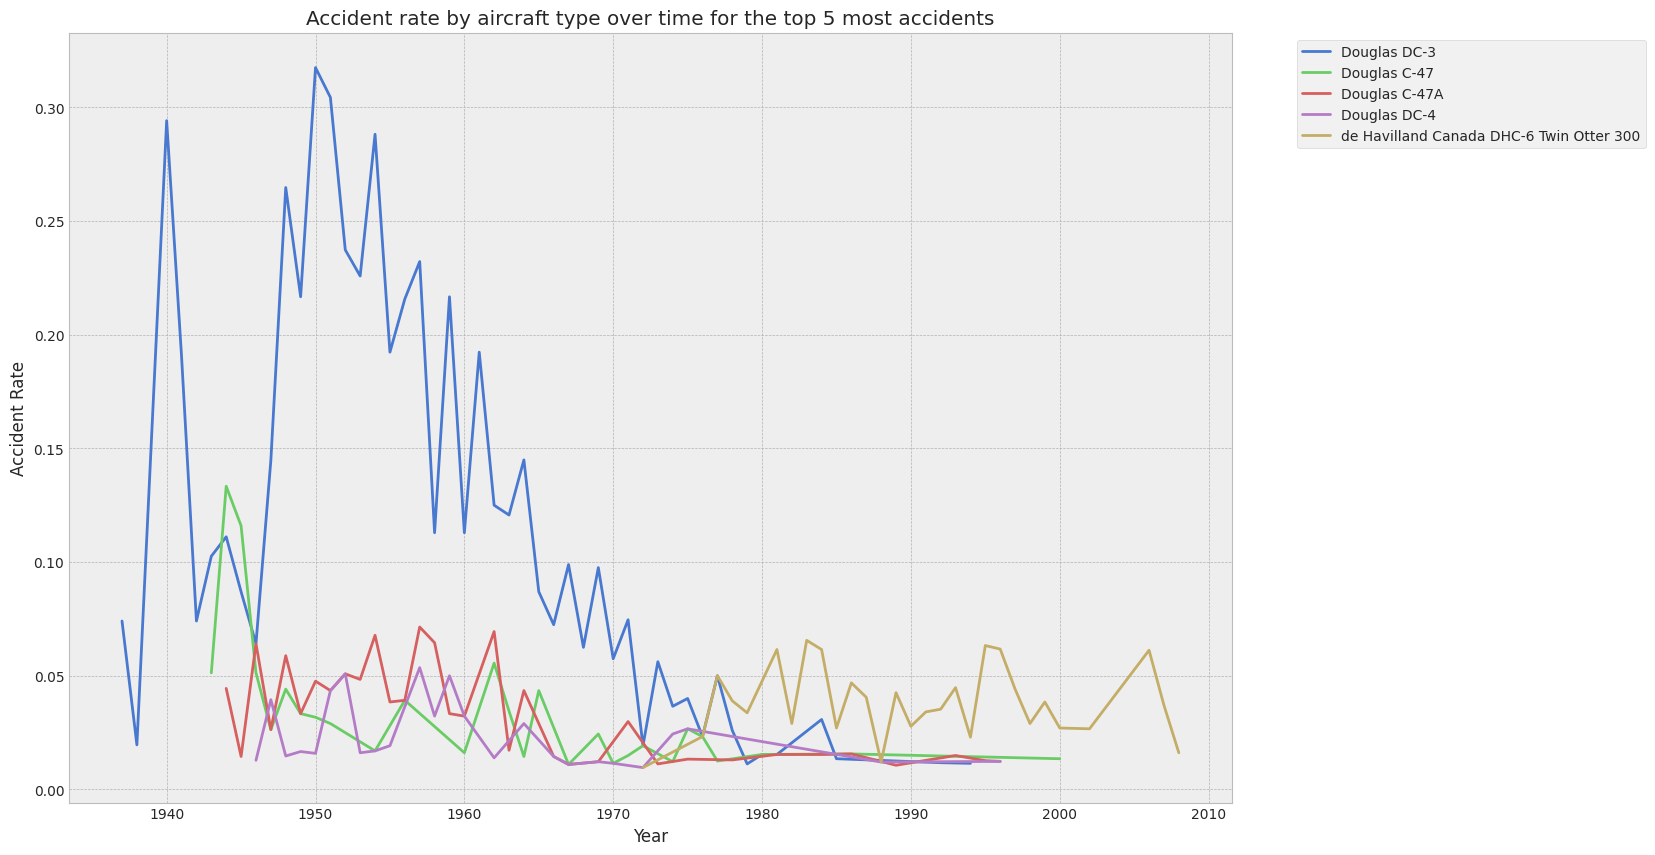

In [ ]:
Data['Date'] = pd.to_datetime(Data['Date'])
# Nhóm theo năm và loại máy bay, và tính tỷ lệ tai nạn
top_5_plane_types = Data['Type'].value_counts().head(5)
accident_rate = Data[Data['Type'].isin(top_5_plane_types.index)].groupby([Data['Date'].dt.year, 'Type']).size() / Data.groupby(Data['Date'].dt.year).size()

# Vẽ tỷ lệ tai nạn theo thời gian cho 10 loại máy bay xuất hiện nhiều nhất
plt.figure(figsize=(15,10))
for plane_type in accident_rate.index.get_level_values('Type').unique():
    plt.plot(accident_rate.loc[:, plane_type], label=plane_type)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Accident Rate')
plt.title('Accident rate by aircraft type over time for the top 5 most accidents')
plt.show()


Mẫu máy bay Douglas DC-3 có tỉ lệ tai nạn cao nhất, đỉnh điểm lên đến hơn 30% trong khi các mẫu máy bay khác chỉ dao động trong khoảng 5%

#Câu 8: Máy bay của hãng nào gặp nhiều tai nạn nhất?

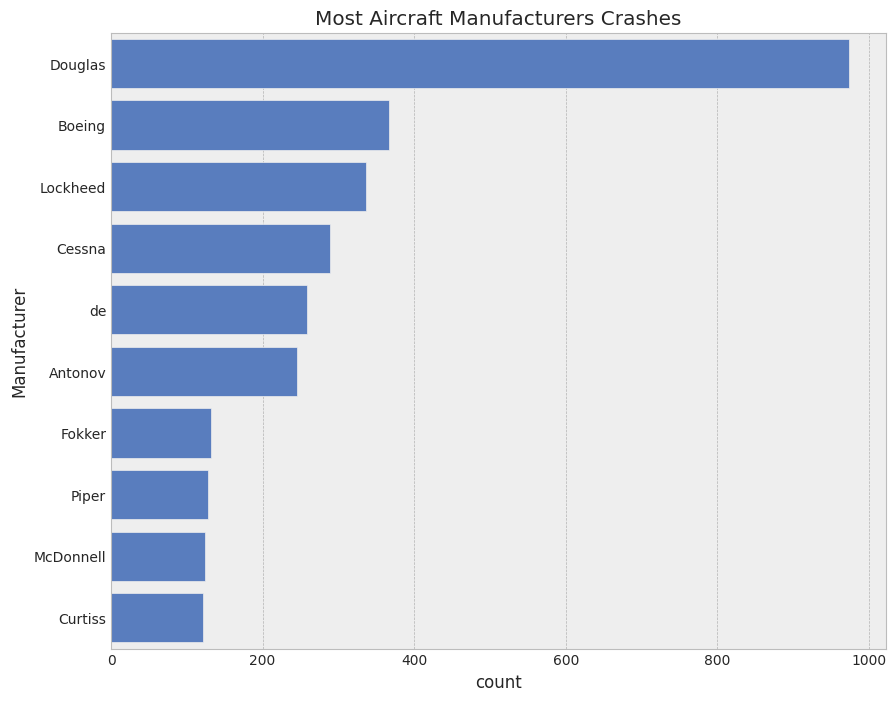

In [ ]:
Data["Manufacturer"] = Data["Type"].apply(lambda x: str(x).split()[0])
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Most Aircraft Manufacturers Crashes')
sns.countplot(data=Data, y='Manufacturer', order=Data.Manufacturer.value_counts().iloc[:10].index, ax=ax)
plt.show()

Hầu hết tất cả các hãng sản xuất máy bay đều xảy ra sự cố tai nạn hàng không. Đáng chú
ý nhất là hãng Douglas của Mỹ với gần 1000 vụ. Nguyên nhân có thể do các vụ tai nạn do máy
bay Douglas DC-3 cao, và hãng sản xuất máy bay ở khoảng thời gian này phát triển mạnh nên
có nhiều loại máy bay được sản xuất và vận hành ảnh hưởng tới tỉ lệ

#Câu 9: Tuyến bay nào gặp tai nạn nhiều nhất?

<Axes: title={'center': 'Most Routes in number of Fatalities'}, xlabel='Total_Fatalities', ylabel='Route'>

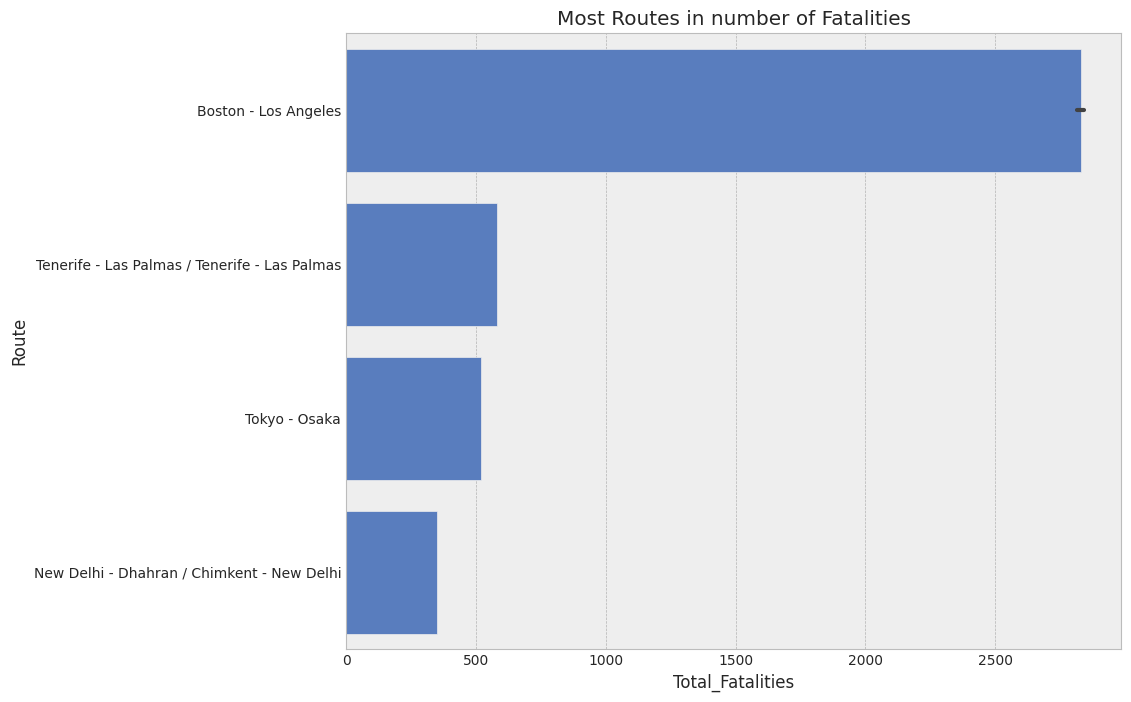

In [ ]:
Data['Total_Fatalities']= Data["Ground"]+Data["Fatalities"]
fig= plt.figure(figsize=(10,8))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0, :])
ax.set_title('Most Routes in number of Fatalities')
sns.barplot(data=Data.sort_values(by='Total_Fatalities',ascending=False)[['Route','Total_Fatalities']].head(5),y='Route',x='Total_Fatalities',ax=ax)

Chặng bay từ Boston tới Los Angeles có số người tử vong do tai nạn máy bay nhiều nhất
với gần 3000 người tử vong. Nguyên nhân có thể do nhu cầu di chuyển ở chặng này lớn, các
chuyến bay được khai thác nhiều nên ảnh hưởng tới tỉ lệ tai nạn máy bay và số lượng người tử
vong.


#Câu 10: Hãng hàng không nào gặp tai nạn nhiều nhất?

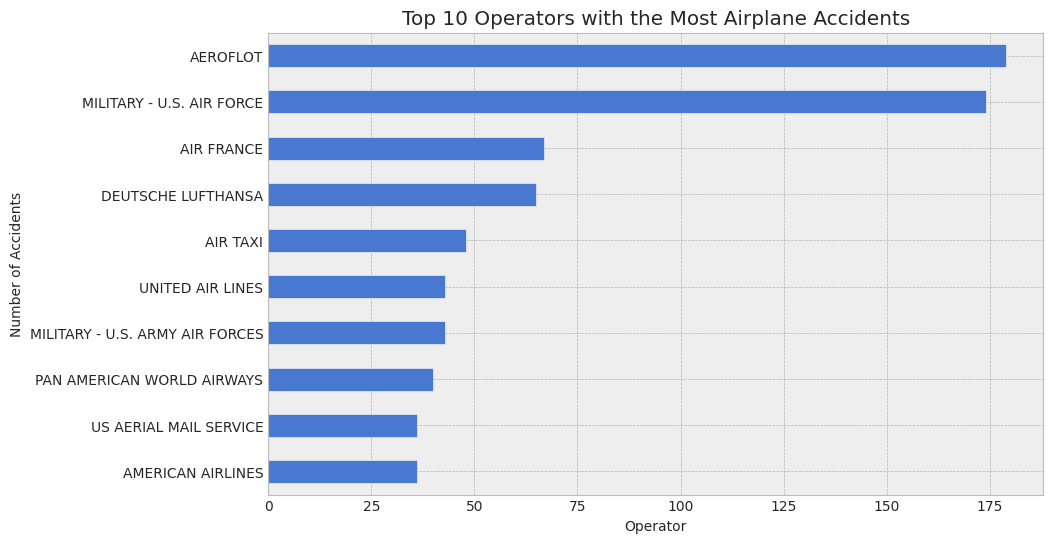

In [ ]:
num_accidents_per_operator = Data['Operator'].value_counts().head(10)
plt.figure(figsize=(10, 6))
num_accidents_per_operator.sort_values().plot(kind='barh')
plt.xlabel('Operator', fontsize=10)
plt.ylabel('Number of Accidents', fontsize=10)
plt.title('Top 10 Operators with the Most Airplane Accidents')
plt.show()

Hãng hàng không xảy ra tai nạn nhiều nhất là AEROFLOT với khoảng hơn 180 vụ. Sau
đó là U.S AIR FORCE với khoảng hơn 175 vụ. Nguyên nhân hãng hàng không AEROFLOT
là hãng hàng không lâu đời nhất thế giới và là hãng vận tải chủ chốt của Nga, số chuyến bay
được khai thác nhiều nên có tỉ lệ tai nạn cao nhất. Còn U.S AIR FORCE thuộc lực lượng
không quân Hoa Kì có thể tỉ lệ tai nạn cao do các vấn đề chiến tranh

#Câu 11: Số lượng tai nạn hàng không của Aeroflot ra sao qua các năm?

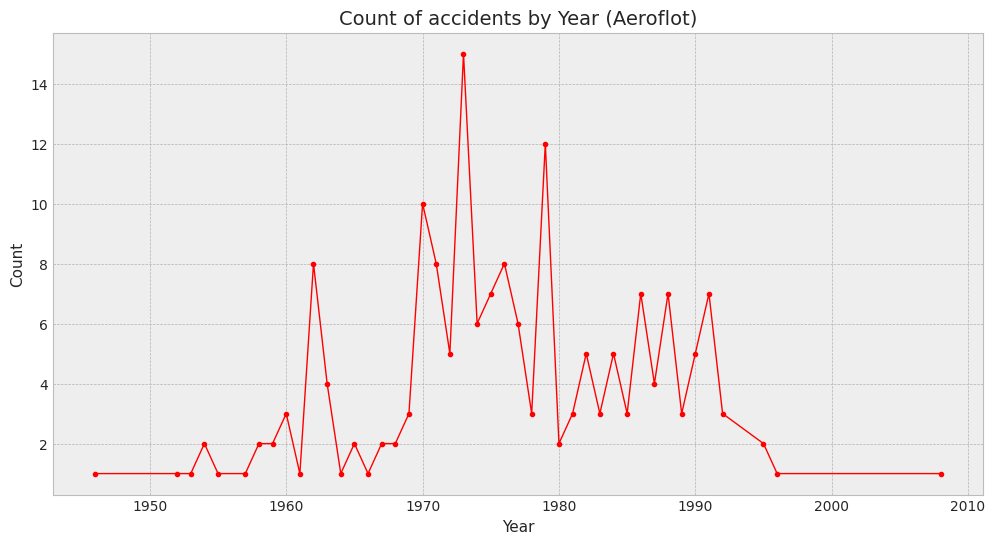

In [ ]:
Aeroflot = Data[Data.Operator == 'AEROFLOT']

Count_by_Year = Aeroflot.groupby(Data.Time.dt.year)[['Date']].count()
Count_by_Year = Count_by_Year.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.plot(Count_by_Year.index, 'Count', data=Count_by_Year, marker='.', color='red', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Count of accidents by Year (Aeroflot)', loc='Center', fontsize=14)
plt.show()

Vào năm 1973, hãng hàng không AEROFLOT xảy ra hơn 14 vụ tai nạn cao nhất trong
khoảng 1908-2009. Hãng hàng không AEROFLOT được thành lập từ 1923 cho nên khoảng từ
1908 đến 1952 chưa ghi nhận vụ tai nạn nào. Sau 1993 tới 2009 cũng không ghi nhận vụ tai nạn
nào, có thể do dữ liệu thu thập được bị giới hạn.

#Câu 12: Tổng số lượng tai nạn theo loại chuyến bay (quân sự hoặc hành khách) là bao nhiêu và ra sao qua từng năm?

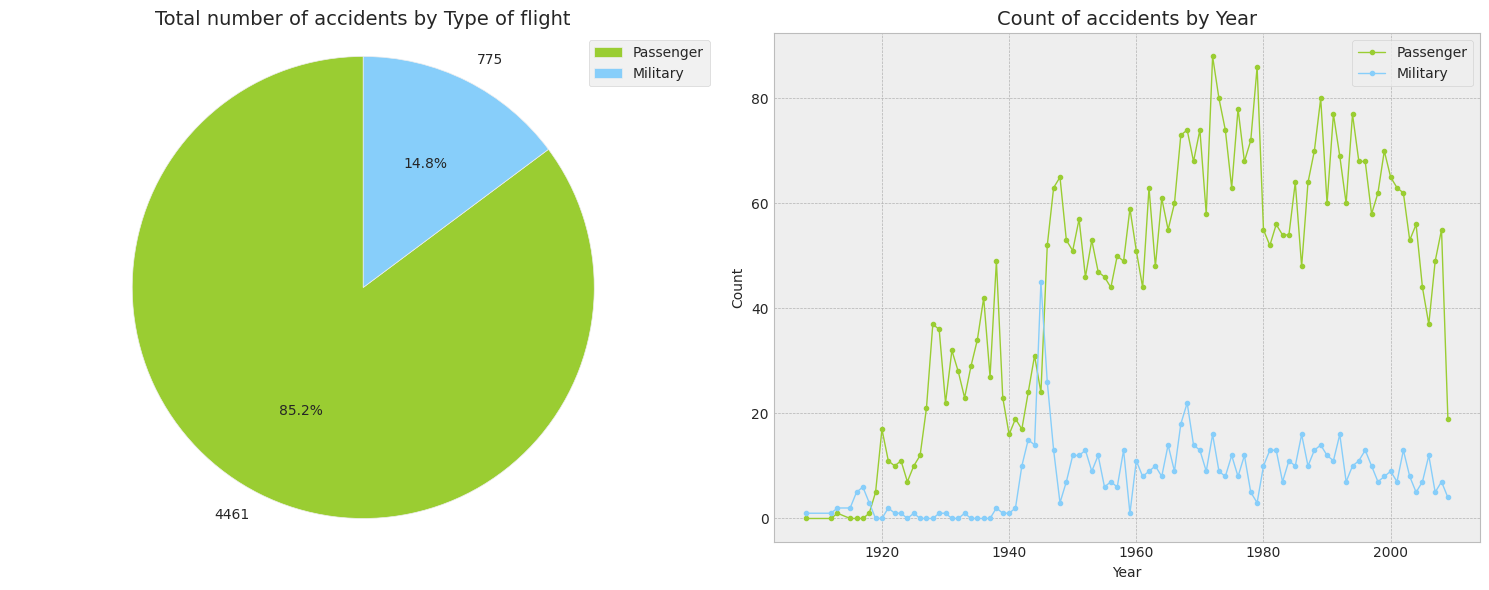

In [ ]:
# Create a copy of the DataFrame and add a new column 'isMilitary'
data_updated = Data.copy()
data_updated['isMilitary'] = data_updated.Operator.str.contains('MILITARY')

# Group by 'isMilitary' and count the number of accidents
Temp = data_updated.groupby('isMilitary').size()
Temp.index = ['Passenger', 'Military']

# Group by year and count the number of military and passenger accidents
Temp2 = data_updated.groupby([data_updated.Time.dt.year, 'isMilitary']).size().unstack(fill_value=0)
Temp2.columns = ['Passenger', 'Military']

colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))

# Plot the total number of accidents by type of flight
plt.subplot(1, 2, 1)
plt.pie(Temp, colors=colors, labels=Temp, startangle=90, autopct='%1.1f%%')
plt.legend(Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)

# Plot the count of accidents by year
plt.subplot(1, 2, 2)
Temp2.plot(ax=plt.gca(), color=colors, marker=".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)

plt.tight_layout()
plt.show()


Số vụ tai nạn máy bay dân sự chiếm 85,1% và tai nạn máy bay quân sự là 14,9%. Nguyên
nhân chính do số lượng máy bay dân sự được khai thác nhiều hơn nên tỉ lệ tai nạn cao hơn.
- Với máy bay quân sự. Vào khoảng Thế chiến thứ 2, máy bay dân sự có số vụ tai nạn tăng
liên tục, cao nhất vào năm 1944. Nhìn chung các vụ tai nạn máy bay quân sự là do chiến
tranh hoặc các mục đích liên quan đến chiến tranh.
- Với máy bay dân sự. Số vụ tai nạn có xu hướng tăng dần từ 1908-1972, xảy ra cao nhất
vào năm 1972. Sau đó có xu hướng giảm dần. Nguyên nhân vào khoảng 1972, hàng không
bắt đầu phát triển mạnh và sau đó kỹ thuật phát triển nên an toàn hàng không được cải
tiến cao hơn nên số vụ tai nạn máy bay dân sự giảm đi đáng kể

#Câu 13: Xu hướng của số lượng người lên máy bay, số người tử vong và số người sống sót trong các vụ tai nạn máy bay qua các năm là gì?

<ipython-input-381-ac3d96b8d37e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Fatalities = Data.groupby(Data.Time.dt.year).sum()
<ipython-input-381-ac3d96b8d37e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Survived = Data.groupby(Data.Time.dt.year).sum()


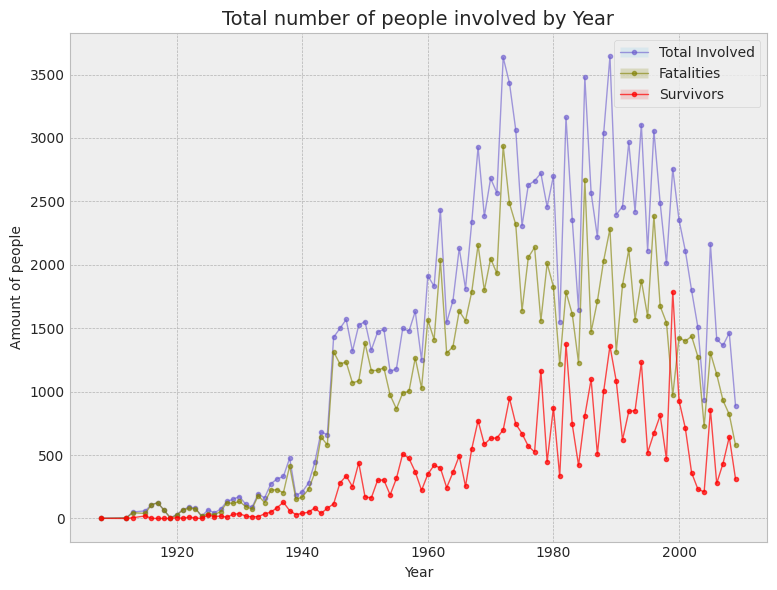

In [ ]:
# Calculate the sum of 'Aboard' and 'Fatalities' for each year
Fatalities = Data.groupby(Data.Time.dt.year).sum()

# Calculate the number of survivors
Data['Survived'] = Data["Aboard"] - Data["Fatalities"]

# Group by year again to get the yearly sum of survivors
Survived = Data.groupby(Data.Time.dt.year).sum()

# Plotting
plt.figure(figsize=(15,6))

# Plot total number of people involved by Year
plt.subplot(1, 2, 1)

# Create proxy artists for the legend
p1, = plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker = ".", color="Slateblue", alpha=0.6, linewidth=1)
p2 = plt.fill(np.NaN, np.NaN, 'skyblue', alpha=0.2)
p3, = plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)
p4 = plt.fill(np.NaN, np.NaN, 'olive', alpha=0.2)
p5, = plt.plot(Survived.index, 'Survived', data=Survived, color="red", marker = ".", alpha=0.7, linewidth=1)
p6 = plt.fill(np.NaN, np.NaN, 'lightcoral', alpha=0.3)

# Add the proxy artists to the legend
plt.legend([(p2[0], p1), (p4[0], p3), (p6[0], p5)], ['Total Involved', 'Fatalities', 'Survivors'], fontsize=10)

plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='Center', fontsize=14)

plt.tight_layout()
plt.show()


- Xanh dương: Tổng số lượng người trên máy bay.
- Xanh lá: Tổng số lượng người thiệt mạng.
- Đỏ: Tổng số lượng người sống sót.

Từ năm 1908 – 1945: Các chuyến bay có số lượng người trên máy bay ít. Tuy nhiên tỉ lệ
tử vong gần như tuyệt đối. Nguyên nhân có thể do khoảng thời gian này mới bắt đầu phát triển
phương tiện hàng không nên tỉ lệ an toàn không cao dẫn đến việc các vụ tai nạn ở khoảng thời
gian này gần như không có người sống sót.

Từ năm 1945 – 2009: Các chuyến bay được khai thác nhiều hơn, số lượng hành khách
cũng được tăng lên và an toàn hàng không cũng được cải tiến nên các vụ tai nạn máy bay mặc
dù tăng nhưng tỉ lệ người sống sót cũng được

#Câu 14: Có bao nhiêu người thiệt mạng so với số người trên máy bay và tỉ lệ là bao nhiêu?

<ipython-input-382-456f81090ebc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Fatalities = Data.groupby(Data.Time.dt.year).sum()


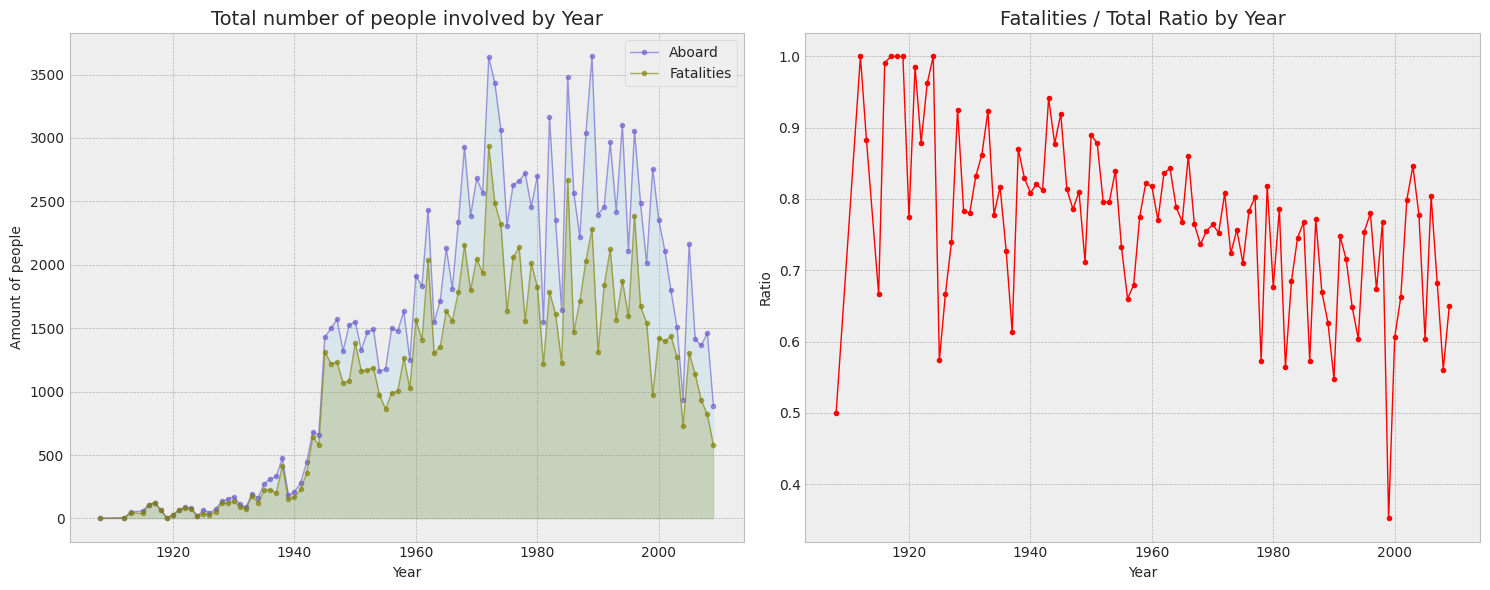

In [ ]:
Fatalities = Data.groupby(Data.Time.dt.year).sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.fill_between(Fatalities.index, 'Aboard', data=Fatalities, color="skyblue", alpha=0.2)
plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker = ".", color="Slateblue", alpha=0.6, linewidth=1)
plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Fatalities.index, 'Proportion', data=Fatalities, marker = ".", color = 'red', linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Fatalities / Total Ratio by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

Tỉ lệ tử vong có xu hướng giảm dần. Từ những năm 1908-1924, có những vụ gần như tử
vong toàn bộ người trên máy bay do tai nạn. Nhưng những năm sau đó tỉ lệ tử vong đã được
giảm. Nguyên nhân có thể do an toàn bay đã được cải thiện. Đặc biệt năm 1999 tỉ lệ tử vong chỉ
chiếm chưa tới 40%

#Câu 15: Có bao nhiêu người sống sót so với số người trên máy bay và tỉ lệ là bao nhiêu?

<ipython-input-383-104ec8a3a36c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Fatalities = Data.groupby(Data.Time.dt.year).sum()
<ipython-input-383-104ec8a3a36c>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Survived = Data.groupby(Data.Time.dt.year).sum()


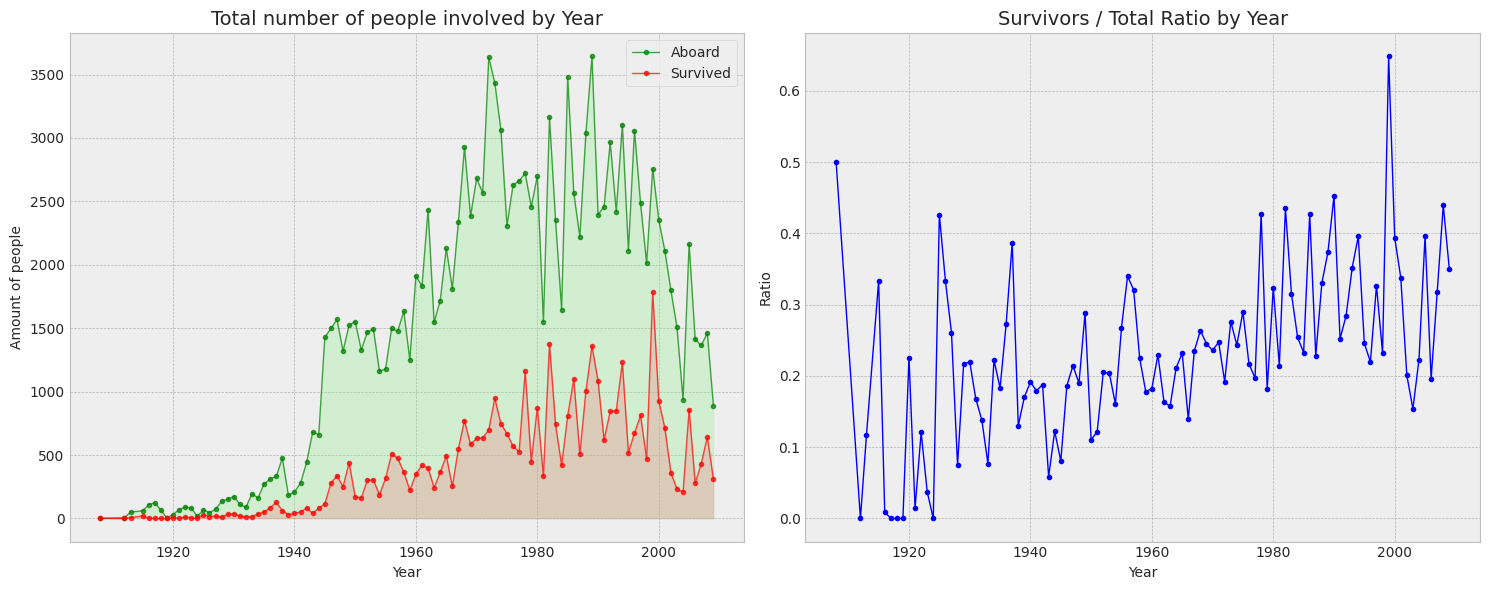

In [ ]:
# Calculate the sum of 'Aboard' and 'Fatalities' for each year
Fatalities = Data.groupby(Data.Time.dt.year).sum()

# Calculate the number of survivors
Data['Survived'] = Data["Aboard"] - Data["Fatalities"]

# Group by year again to get the yearly sum of survivors
Survived = Data.groupby(Data.Time.dt.year).sum()

# Calculate the proportion of survivors
Survived['Proportion'] = Survived['Survived'] / Survived['Aboard']

# Plotting
plt.figure(figsize=(15,6))

# Plot total number of people involved by Year
plt.subplot(1, 2, 1)
plt.fill_between(Survived.index, 'Aboard', data=Survived, color="lightgreen", alpha=0.3)
plt.plot(Survived.index, 'Aboard', data=Survived, marker = ".", color="green", alpha=0.7, linewidth=1)
plt.fill_between(Survived.index, 'Survived', data=Survived, color="lightcoral", alpha=0.3)
plt.plot(Survived.index, 'Survived', data=Survived, color="red", marker = ".", alpha=0.7, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='Center', fontsize=14)

# Plot Survivors / Total Ratio by Year
plt.subplot(1, 2, 2)
plt.plot(Survived.index, 'Proportion', data=Survived, marker = ".", color = 'blue', linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Survivors / Total Ratio by Year', loc='Center', fontsize=14)

plt.tight_layout()
plt.show()


Trái ngược với tỉ lệ tử vong, tỉ lệ sống sót ở các vụ tai nạn máy bay có xu hướng tăng. Cao
nhất vào năm 1999, tỉ lệ sống sót hơn 60%. Chứng tỏ an toàn hàng không đang được dần cải
thiện

#Câu 16: Tai nạn hàng không xảy ra với tỷ lệ như thế nào giữa các loại hạng mục khác nhau (Quân sự, Dịch vụ, Riêng tư, Dân sự)?

<Axes: title={'center': 'Percentage of Crashed based on Category'}, ylabel='Category'>

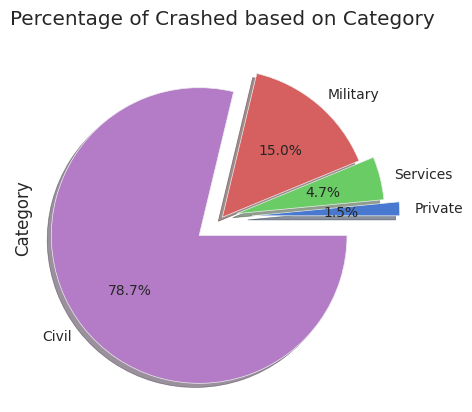

In [ ]:
# Chuyển đổi kiểu dữ liệu của cột "Operator" thành chuỗi
Data["Operator"] = Data["Operator"].astype(str)

# Tạo cột mới "Category" dựa trên cột "Operator"
Data["Category"] = Data["Operator"].apply(
    lambda x: "Military" if ((x.lower().find("military") != -1) or
                             (x.lower().find("force") != -1) or
                             (x.lower().find("army") != -1))
              else ("Services" if (x.lower().find("office") != -1) or
                                 (x.lower().find("mail") != -1) or
                                 (x.lower().find("service") != -1)
                    else ("Private" if (x.lower().find("private") != -1)
                          else "Civil"))
)

# Vẽ biểu đồ pie để hiển thị phần trăm tai nạn dựa trên loại
Data["Category"].value_counts().sort_values().plot(
    title='Percentage of Crashed based on Category',
    kind='pie',
    autopct='%0.1f%%',
    explode=(0.2,0.1,0,0.2),
    shadow=True,
    startangle=0
)



- Military: Quân sự.
- Services: Dịch vụ.
- Private: Tư nhân.
- Civil: Dân sự.

Các vụ tai nạn máy bay dân sự chiếm tỉ lệ cao nhất với 78,7%. Sau đó là quân sự chiểm
15,1%. Tiếp đến dịch vụ 4,7%. Cuối cùng là tư nhân với 1,5%. Do các chuyến bay dân sự được
khai thác nhiều hơn hàng năm nên chiếm tỉ lệ cao hơn. Các chuyến bay quân sự chỉ có khi xảy
ra chiến tranh hoặc mục đích liên

#Câu 17: Các khu vực nào thường xảy ra tai nạn?

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


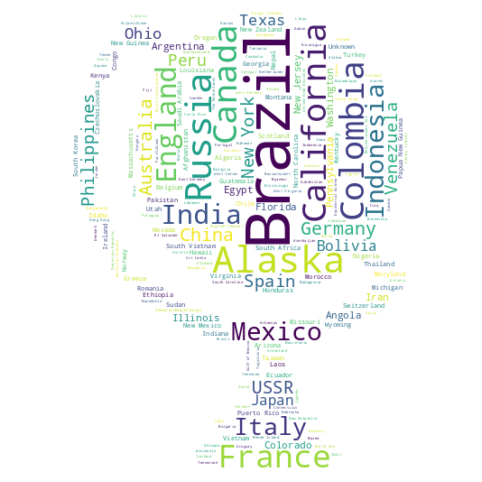

In [ ]:
from wordcloud import WordCloud
from PIL import Image

# Tạo một cột mới 'Country' từ cột 'Location'
Data['Country'] = Data['Location'].apply(lambda x: x.split(',')[-1] if isinstance(x, str) else np.nan)

# Loại bỏ các giá trị NaN
Data = Data.dropna(subset=['Country'])

# Đếm số lượng tai nạn theo quốc gia
accidents_by_country = Data['Country'].value_counts()

# Tạo một từ điển với quốc gia làm khóa và số lượng tai nạn làm giá trị
country_dict = accidents_by_country.to_dict()

mask_image = Image.open('/content/drive/MyDrive/PTDL/Doan/Image/earth-globe_232607.png').convert('L')
mask = np.array(mask_image)

# Tạo một đối tượng WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=mask).generate_from_frequencies(country_dict)
# Vẽ biểu đồ WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Tai nạn máy bay xảy ra hầu hết trên toàn cầu vào thời điểm này. Đáng chú ý nhất là Brazil


#Câu 18: số lượng tai nạn máy bay của các nhà khai thác hàng không tại Brazil ra sao?

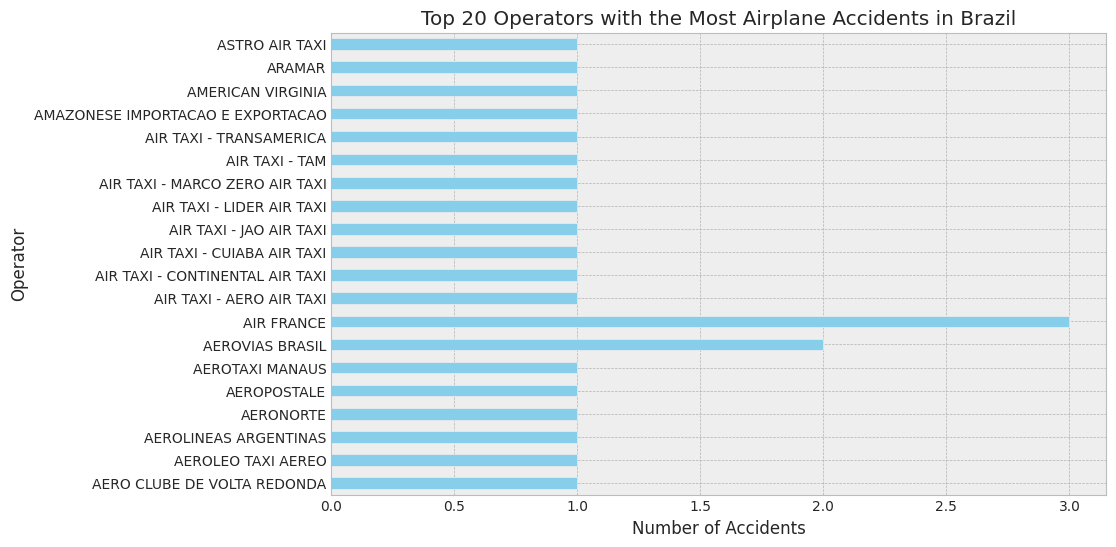

In [ ]:
import matplotlib.pyplot as plt

# Lọc dữ liệu chỉ chứa các sự cố xảy ra ở Brazil
filter_br = Data['Location'].str.contains('Brazil')

# Đếm số lượng sự cố cho mỗi nhà khai thác
operator_counts = Data[filter_br]['Operator'].value_counts().sort_index().head(20)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
operator_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Accidents')
plt.ylabel('Operator')
plt.title('Top 20 Operators with the Most Airplane Accidents in Brazil')
plt.show()


Các vụ tai nạn máy bay ở Brazil tập trung cao nhất ở hãng
hàng không AIR FRANCE với 3 vụ. Đây là hãng hàng không quốc gia Pháp nên số lượng chuyến
bay khai thác nhiều nên dẫn đến số vụ tai nạn có tỉ lệ cao hơn. Sau đó là hãng AEROVIAS
BRASIL là hãng hàng không Brazil với 2 vụ tai nạn

#Câu 19: Các nguyên nhân nào dẫn đến tai nạn?

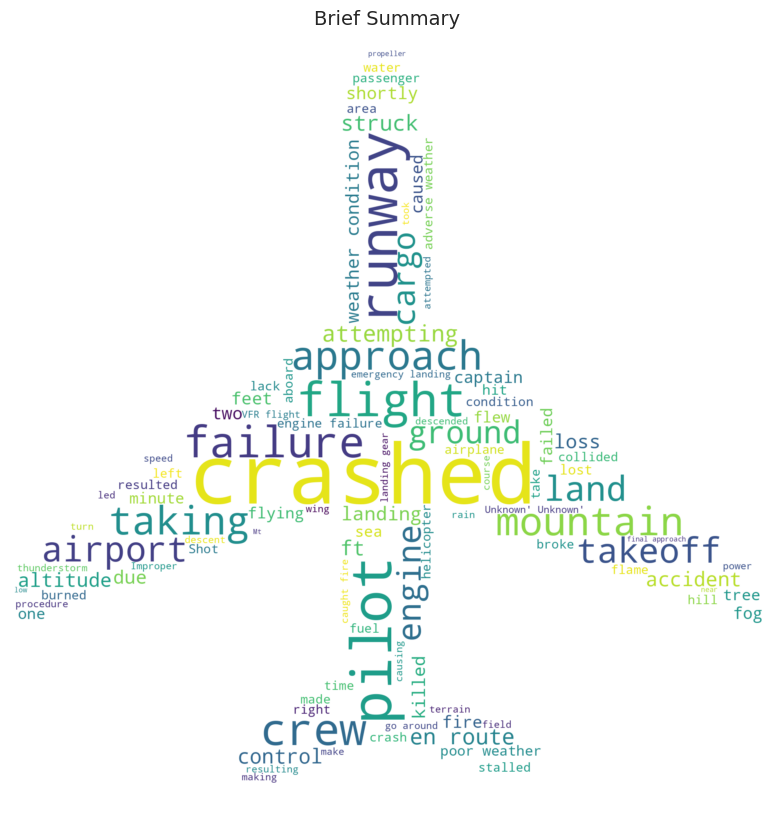

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(Data.Summary.tolist())
plane_mask = np.array(Image.open('/content/drive/MyDrive/PTDL/Doan/Image/airplane-icon-png-2491.png'))

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')

wc = WordCloud(background_color="white", max_words=100, mask=plane_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Brief Summary', loc='Center', fontsize=14)
plt.show()

Có nhiều nguyên nhân tai nạn máy bay. Chủ yếu là do bị rơi chiếm tỉ lệ cao nhất. Sau đó
là tai nạn do gặp vấn đề trên đường băng và do phi công hoặc phi hành đoàn. Hoặc do các vấn
đề về kỹ thuật, động cơ máy bay cũng ảnh hưởng nhiều đến tai nạn. Các yếu tố do địa hình như
do núi, do sân bay, do đất cũng ảnh hưởng tới tai nạn máy bay.


#Câu 20: Có bao nhiêu vụ mất tích máy bay theo thời gian?

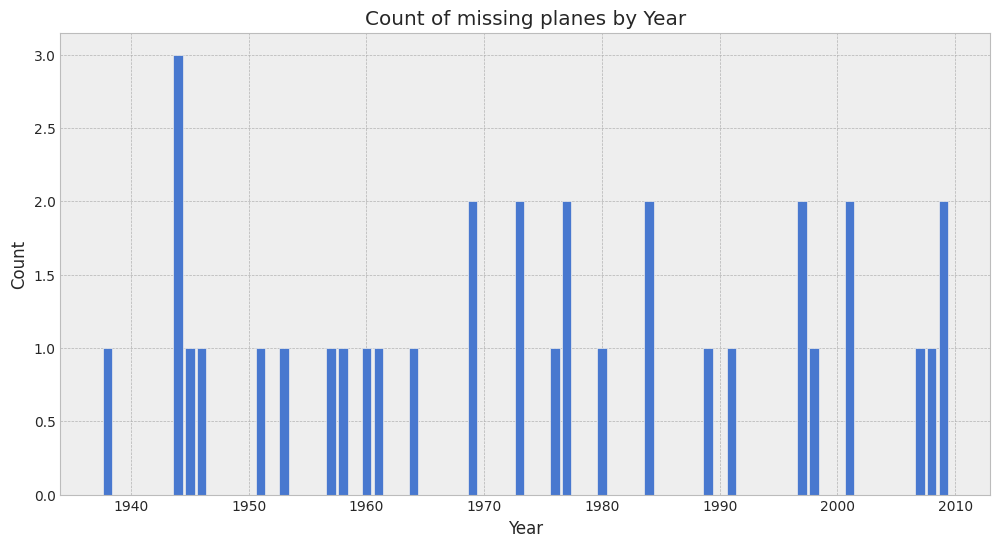

In [ ]:
missing_planes = Data[Data['Summary'].str.contains('missing', na=False, case=False)]

# Đếm số lượng máy bay mất tích theo năm
missing_count_by_year = missing_planes.groupby(missing_planes.Time.dt.year)['Date'].count()

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
plt.bar(missing_count_by_year.index, missing_count_by_year.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of missing planes by Year')
plt.show()

Các vụ mất tích máy bay diễn ra không thường xuyên trong các năm. Năm 1944 có số vụ
mất tích máy bay cao nhất với 3 vụ. Sau đó là các năm 1969, 1973, 1977, 1984, 1997, 2001 với
2 vụ. Có những năm liên tiếp sảy ra mất tích máy bay: 3 năm liên tiếp như 1944-1946 với tổng
5 vụ, 2007-2009 với tổng 4 vụ; 2 năm liên tiếp như 1957-1958 với tổng 2 vụ, 1960-1861 với
tổng 2 vụ, 1976-1977 với tổng 3 vụ.

#Câu 21: Có bao nhiêu vụ cướp máy bay theo thời gian?

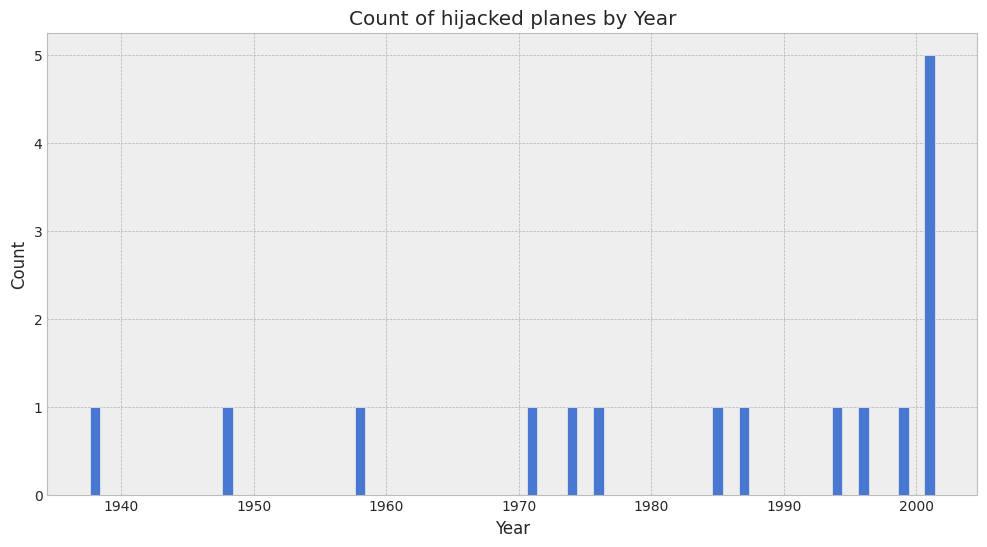

In [ ]:
# Tạo DataFrame mới chỉ chứa các trường hợp máy bay mất tích
hijacked_planes = Data[Data['Summary'].str.contains('hijacked', na=False, case=False)]

# Đếm số lượng máy bay mất tích theo năm
hijacked_count_by_year = hijacked_planes.groupby(hijacked_planes.Time.dt.year)['Date'].count()

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
plt.bar(hijacked_count_by_year.index, hijacked_count_by_year.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of hijacked planes by Year')
plt.show()


Tập dữ liệu có ghi nhận trường hợp tai nạn máy bay do bị cướp máy bay. Cao nhất vào
năm 2001 với tổng 5 vụ cướp máy bay. Vào năm 2001, nguyên nhân có thể liên quan đến 2 vụ
cướp máy bay khủng bố làm đổ hai tòa tháp của Trung tâm thương mại thế giới ở New York vào
11/9/2001.


#Câu 22: kiểm tra tính ổn định của dữ liệu

In [ ]:
Data['Difference'] = Data['Fatalities'].diff(periods=1)
Data = Data.dropna()

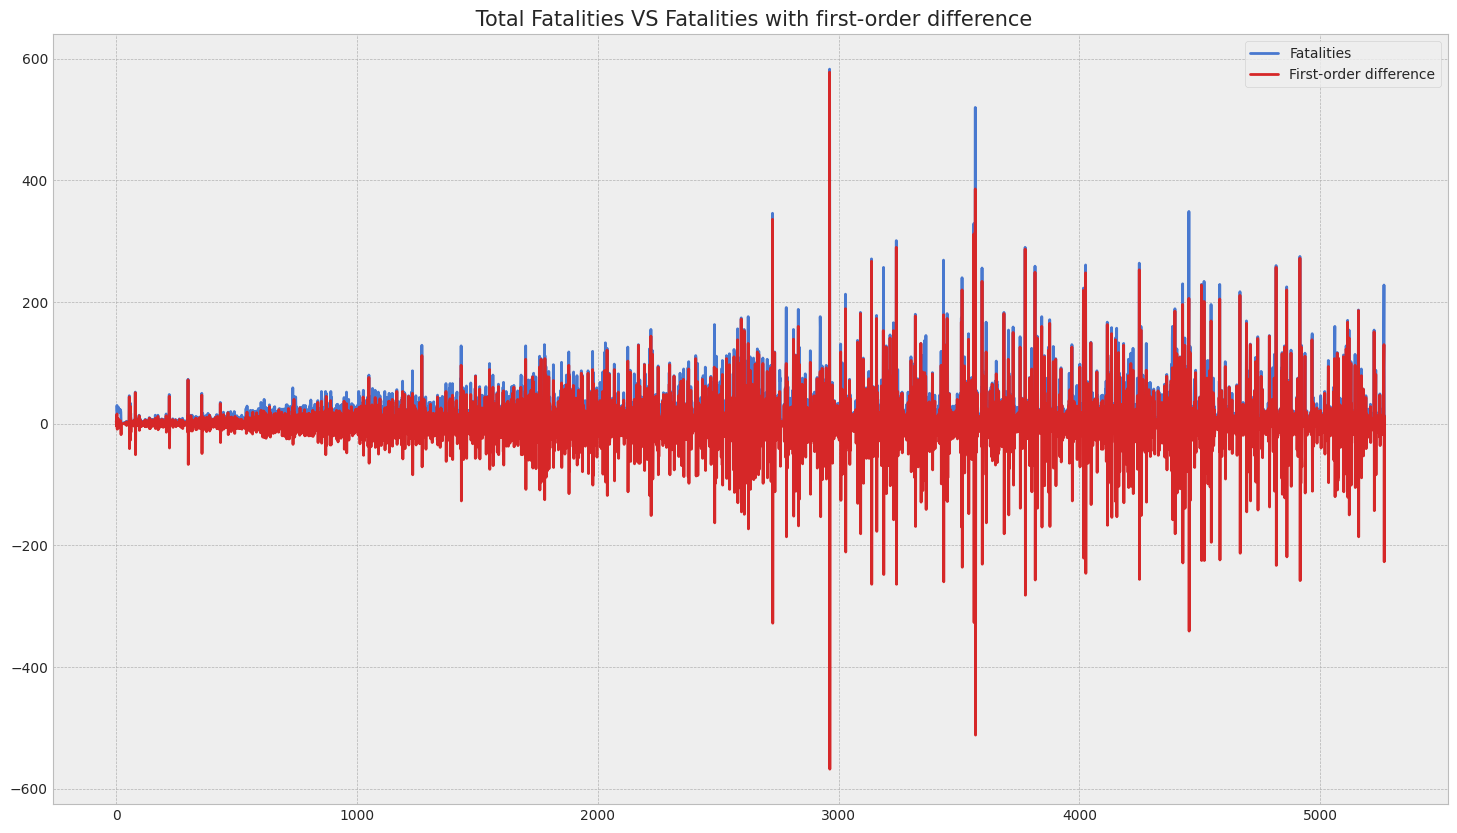

In [ ]:
plt.figure(figsize= (18,10))
plt.plot(Data['Fatalities'], label='Fatalities')
plt.plot(Data['Difference'], label='First-order difference', color='tab:red')
plt.title(' Total Fatalities VS Fatalities with first-order difference', size=15)
plt.legend()

In [ ]:
Data_series = pd.Series(Data['Fatalities']) # or 'Difference'
adf_result = adfuller(Data_series, autolag='AIC')
adf_result

(-9.801945773801489,
 5.962796397779616e-17,
 28,
 5206,
 {'1%': -3.4316067282534295,
  '5%': -2.8620953428293725,
  '10%': -2.5670656088301436},
 51192.03501511731)

In [ ]:
print('ADF Test Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
print(adf_result[4])
if adf_result[0] < adf_result[4]["5%"]:
  print("Reject Null Hypothesis - Time Series is Stationary")
else:
  print("Failed to Reject Null Hypothesis - Time Series is Non-Stationary")


ADF Test Statistic: -9.801946
p-value: 0.000000
Critical Values:
{'1%': -3.4316067282534295, '5%': -2.8620953428293725, '10%': -2.5670656088301436}
Reject Null Hypothesis - Time Series is Stationary


Vì chỉ số giá trị kiểm kê kiểm định ADF (ADF Test Statistic) có giá trị là -9.8 bé hơn Critical Values tại mức 5% nên dữ liệu có tính ổn định

# Kết luận

Qua quá trình phân tích nhóm đã trả lời được các câu hỏi liên quan đến vấn đề tai nạn máy
bay thông qua các phương pháp phân tích của Data Analysis trong Data Science như “Nguyên
nhân nào dẫn đến các vụ tai nạn máy bay?; Yếu tố nào ảnh hưởng tới tai nạn máy bay?”. Đây
là những thông tin quan trọng giúp ích được cho các hãng hàng không hay các nhà sản xuất
máy bay có thể có hướng nâng cao chất lượng an toàn hàng không. Giúp cho các nhu cầu vận
chuyền hành khách, quân sự, dịch vụ,... trở nên an toàn và được nhiều người tin dùng hơn. Một số yếu tố quan trọng ảnh hưởng tới chất lượng chuyến bay như vấn đề kỹ thuật máy bay
cần kiểm tra và thử nghiệm kỹ các loại máy bay được sản xuất trước khi đem vào sử dụng;
cần đào tạo phi công và các phi hành đoàn có khả năng xử lý tình huống khi máy bay có vấn
đề phát sinh để giảm khả năng thiệt hại; sân bay và đường băng cũng phải đạt chuẩn kỹ thuật
để tạo điều kiện thuận lợi nhất cho việc máy bay cất cánh và hạ cánh; các yếu tố thời tiết cũng
rất quan trọng, cần phải quan sát thời tiết trước khi cho một chuyến bay cất cánh để tránh ảnh
hưởng tới an toàn bay; tránh bay ở các khu vực đồi núi nguy hiểm và có thời tiết